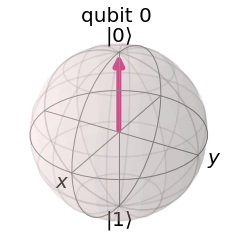

In [545]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.quantum_info import random_state
from qiskit.circuit import random
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import plot_bloch_multivector ,plot_bloch_vector ,plot_state_qsphere
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.quantum_info.synthesis import euler_angles_1q 
from qiskit.tools.monitor import job_monitor
from scipy.linalg import sqrtm 
from numpy import pi
import cmath,math
from random import seed
from random import random,randint



# 1> Provide a variational circuit which is able to generate the most general 1 qubit state.
#    By most general 1 qubit state we mean that there exists a set of the parameters in the
#    circuit such that any point in the Bloch sphere can be reached.Check that the circuit
#    works correctly by showing that by varying randomly the parameters of your circuit you
#    can reproduce correctly the Bloch sphere.

# parameterized circuit is u gate
# 2 parameters are enough to reach every point of blochsphere 
# they are θ - (0 to pi, 1st input of u gate) and ϕ - (0 to 2pi , 2nd input of u gate)
# varying paramaeters in terms of 90(pi/2) degrees and while varying ϕ keeping θ=90 for visual difference

#  when θ=0  ϕ=0
circuit = QuantumCircuit(1,1)
circuit.u(0,0,0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

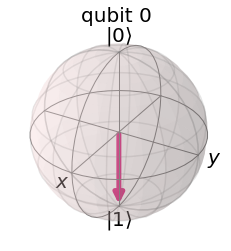

In [546]:
#  when θ=pi  ϕ=0
circuit = QuantumCircuit(1,1)
circuit.u(pi,0,0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

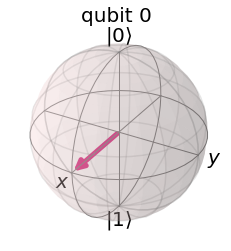

In [547]:
#  when θ=pi/2  ϕ=0
circuit = QuantumCircuit(1,1)
circuit.u(pi/2,0,0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

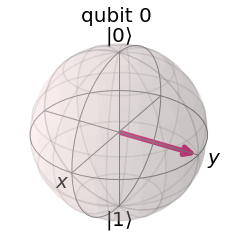

In [548]:
#  when θ=pi/2  ϕ=pi/2
circuit = QuantumCircuit(1,1)
circuit.u(pi/2,pi/2,0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

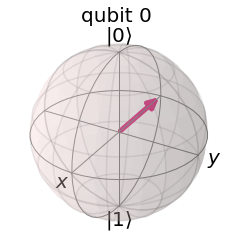

In [549]:
#  when θ=pi/2  ϕ=pi
circuit = QuantumCircuit(1,1)
circuit.u(pi/2,pi,0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

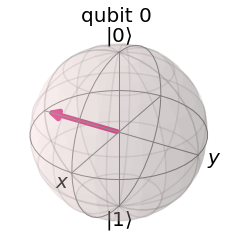

In [550]:
#  when θ=pi/2 ϕ=3pi/2
circuit = QuantumCircuit(1,1)
circuit.u(pi/2,((3*pi)/2),0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

[0.70710678+0.00000000e+00j 0.70710678-1.73191211e-16j]


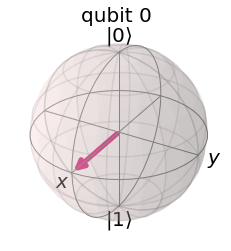

In [551]:
#  when θ= pi/2  ϕ=2pi
circuit = QuantumCircuit(1,1)
circuit.u(pi/2,(2*pi),0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

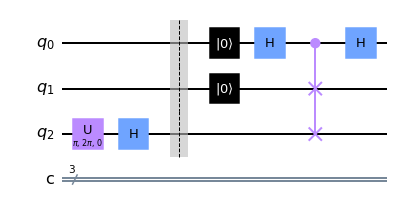

In [555]:
# based on above plotted bloch spheres concluding  
# with combination of  θ & ϕ u-gate can produce any single q bit state

# 2&3> Use the circuit built in step 1) and, using the SWAP test,
#      find the best choice of your parameters to reproduce a randomly
#      generated quantum state made with 1 qubit

# generating a random circuit for random qbit later cascading with swap circuit
qreg_q = QuantumRegister(3,'q')
creg_c = ClassicalRegister(3, 'c')

# random circuit
theta = pi*randint(0,1)
phi = pi*randint(0,2)
circuit = QuantumCircuit(qreg_q,creg_c)
circuit.u(theta,phi,0,2)
circuit.h(2)
circuit.barrier(range(3))


# swap circuit

circuit.reset(1)
circuit.reset(0)
circuit.h(0)
circuit.cswap(0,1,2)
circuit.h(0)

circuit.draw(output='mpl')

[(0.7071067811865476-3.030846196824227e-16j), (1.5907354687065934e-32+4.3297802811774664e-17j)]


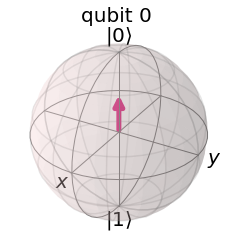

In [556]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, simulator).result()
statevector = result.get_statevector()
dm = list(statevector)
for i in range(len(dm)):
    if(len(dm) == 2):
        break
    else:
        dm.pop(len(dm)-1)


print(dm)
theta = 2*cmath.acos(dm[0].real)
theta = theta.real

#print(theta)
if(dm[0].imag > 1):
    phi_inter = dm[0].imag
    phi_inter = phi_inter.real
    frac = (cmath.sin(theta/2))
    frac = frac.real
    print(frac)
    phi_inter = phi_inter/frac
    phi = math.log(phi_inter)

plot_bloch_multivector(dm)

[0.70710678+0.00000000e+00j 0.70710678-1.73191211e-16j]


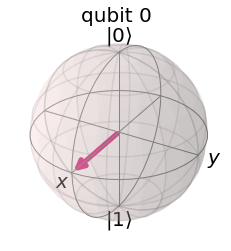

In [557]:
# during floating point conversion it loses some accuracy but produces near one
circuit = QuantumCircuit(1,1)
circuit.u(theta,phi,0,0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)